In [1]:
cd /content/drive/My\ Drive/Goprac AI/

/content/drive/My Drive/Goprac AI


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as k
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#FUnction to get image data from folders

labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_data('/content/drive/My Drive/Goprac AI/train')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [5]:
val = get_data('/content/drive/My Drive/Goprac AI/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


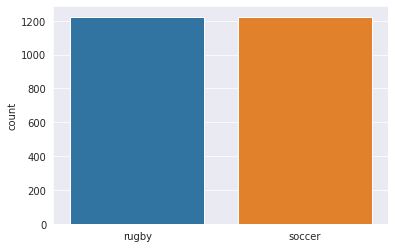

In [7]:
#Visualize soccer and rugby  numbers in train data
l = []
for i in train:
    if(i[1] == 0):
        l.append("rugby")
    else:
        l.append("soccer")
sns.set_style('darkgrid')
sns.countplot(l)

In [8]:
#Data Prepration

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255


In [9]:
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

In [11]:
x_train.shape

(2448, 224, 224, 3)

In [12]:
TIMESTEPS = x_train.shape[1]
N_FEATURES = x_train.shape[2]

# Multiple (Maximum and Range) Pooling Statistics in a Convolution Network

In [14]:
x = Input(shape=(TIMESTEPS, N_FEATURES,3))
conv = Conv2D( filters =16 , kernel_size =4, activation = 'linear',padding = 'valid')(x)

max_statistic = MaxPool2D( pool_size =4, padding = 'valid')(conv)

# right operations
# 1. negative of feature map
range_statistic = tf.math.negative(conv)
# 2. apply maxpool to get the min statistics
range_statistic = MaxPool2D(pool_size =4, padding ='valid')(range_statistic)
# 3. negative of negative in step (1) to revert to original
range_statistic = tf.math.negative(range_statistic)
# 4. subtract with max_statistic to get the
# range statistic max(x) - min(x)
range_statistic_final = tf.math.subtract(max_statistic , range_statistic)

# Concatenate the pool
concatted = tf.keras.layers.Concatenate()([max_statistic, range_statistic_final])

features = Flatten()(concatted)

features = ReLU()(features)

# 128 nodes for lookback = 20 or 40.
dense = Dense( units =256, activation = 'relu')(features)
predictions = Dense( units =1, activation = 'sigmoid' , name = 'output')( dense )

model = Model(inputs =x, outputs = predictions)

In [15]:
# Train the model
model.compile (optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy', tf.keras.metrics.AUC()])

In [16]:
history = model.fit(x= x_train ,y= y_train, batch_size =64 ,epochs =50 ,validation_data =( x_val,y_val ),verbose =1).history

Epoch 1/50
39/39 [==============================] - 83s 2s/step - loss: 4.3988 - accuracy: 0.5437 - auc: 0.5442 - val_loss: 0.7026 - val_accuracy: 0.6393 - val_auc: 0.6733
Epoch 2/50
39/39 [==============================] - 82s 2s/step - loss: 0.5776 - accuracy: 0.7087 - auc: 0.7744 - val_loss: 0.5580 - val_accuracy: 0.6984 - val_auc: 0.8771
Epoch 3/50
39/39 [==============================] - 80s 2s/step - loss: 0.4864 - accuracy: 0.7574 - auc: 0.8448 - val_loss: 0.4335 - val_accuracy: 0.8246 - val_auc: 0.9063
Epoch 4/50
39/39 [==============================] - 80s 2s/step - loss: 0.4152 - accuracy: 0.8043 - auc: 0.8908 - val_loss: 0.4623 - val_accuracy: 0.7967 - val_auc: 0.8963
Epoch 5/50
39/39 [==============================] - 81s 2s/step - loss: 0.3052 - accuracy: 0.8766 - auc: 0.9532 - val_loss: 0.4400 - val_accuracy: 0.8033 - val_auc: 0.8972
Epoch 6/50
39/39 [==============================] - 80s 2s/step - loss: 0.2631 - accuracy: 0.9011 - auc: 0.9695 - val_loss: 0.5872 - val_acc

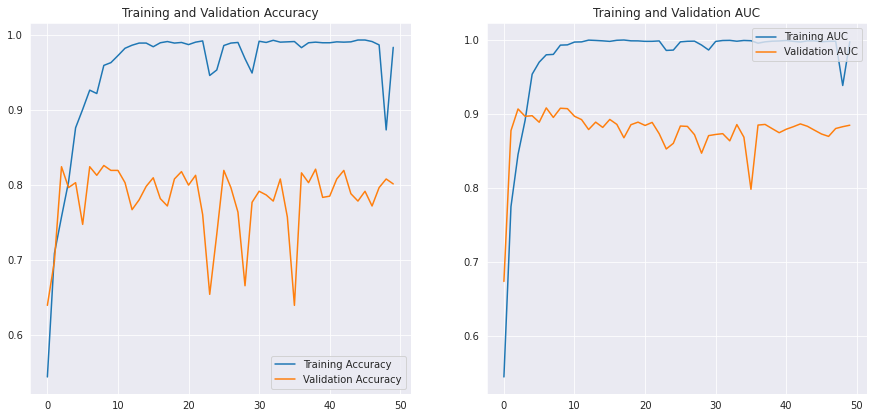

In [17]:
acc = history['accuracy']
val_acc = history['val_accuracy']
auc = history['auc']
val_auc = history['val_auc']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label='Validation AUC')
plt.legend(loc='upper right')
plt.title('Training and Validation AUC')
plt.show()


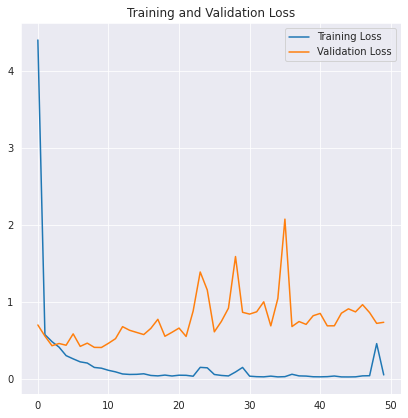

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Simple Maximum Pooling Statistics in a Convolution Network

In [19]:
x = Input(shape=(TIMESTEPS, N_FEATURES,3))
conv = Conv2D( filters =16 , kernel_size =4, activation = 'linear',padding = 'valid')(x)

max_statistic = MaxPool2D( pool_size =4, padding = 'valid')(conv)

features = Flatten()(max_statistic)

features = ReLU()(features)

dense = Dense( units =256, activation = 'relu')(features)
predictions = Dense( units =1, activation = 'sigmoid' , name = 'output')( dense )

model = Model(inputs =x, outputs = predictions)

In [20]:
model.compile (optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy', tf.keras.metrics.AUC()])

In [21]:
history = model.fit(x= x_train ,y= y_train, batch_size =64 ,epochs =50 ,validation_data =( x_val,y_val ),verbose =1).history

Epoch 1/50
39/39 [==============================] - 60s 2s/step - loss: 2.5136 - accuracy: 0.5192 - auc_1: 0.5138 - val_loss: 0.6615 - val_accuracy: 0.5082 - val_auc_1: 0.7877
Epoch 2/50
39/39 [==============================] - 59s 2s/step - loss: 0.6321 - accuracy: 0.6605 - auc_1: 0.7261 - val_loss: 0.5892 - val_accuracy: 0.7443 - val_auc_1: 0.8034
Epoch 3/50
39/39 [==============================] - 58s 2s/step - loss: 0.5667 - accuracy: 0.7190 - auc_1: 0.7924 - val_loss: 0.5464 - val_accuracy: 0.7689 - val_auc_1: 0.8505
Epoch 4/50
39/39 [==============================] - 59s 2s/step - loss: 0.4950 - accuracy: 0.7737 - auc_1: 0.8579 - val_loss: 0.5074 - val_accuracy: 0.7951 - val_auc_1: 0.8632
Epoch 5/50
39/39 [==============================] - 59s 2s/step - loss: 0.4224 - accuracy: 0.8284 - auc_1: 0.9079 - val_loss: 0.4901 - val_accuracy: 0.7852 - val_auc_1: 0.8561
Epoch 6/50
39/39 [==============================] - 59s 2s/step - loss: 0.3471 - accuracy: 0.8693 - auc_1: 0.9456 - val_

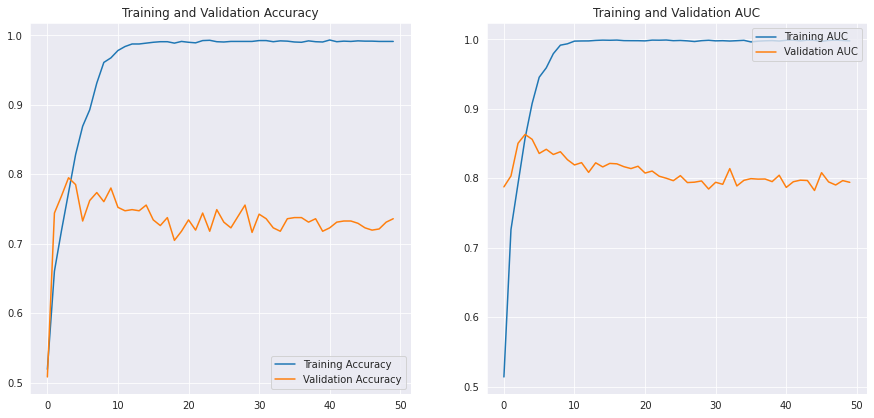

In [24]:
acc = history['accuracy']
val_acc = history['val_accuracy']
auc = history['auc_1']
val_auc = history['val_auc_1']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label='Validation AUC')
plt.legend(loc='upper right')
plt.title('Training and Validation AUC')
plt.show()


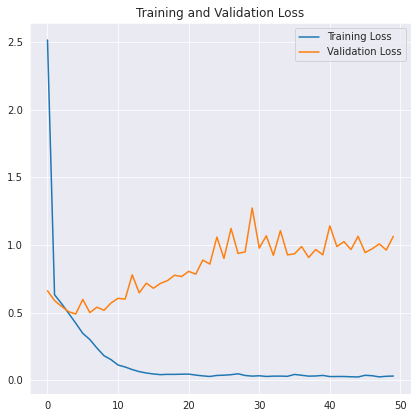

In [25]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()